In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['MedianHouseholdIncome2015.csv', 'PercentagePeopleBelowPovertyLevel.csv', 'PercentOver25CompletedHighSchool.csv', 'PoliceKillingsUS.csv', 'ShareRaceByCity.csv']


In [138]:
median_house_hold_in_come = pd.read_csv('../input/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('../input/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('../input/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('../input/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('../input/PoliceKillingsUS.csv', encoding="windows-1252")

In [139]:
percentage_people_below_poverty_level.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [140]:
#percentage_people_below_poverty_level.poverty_rate.value_counts()

In [141]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: module 'matplotlib.pyplot' has no attribute 'xtick'

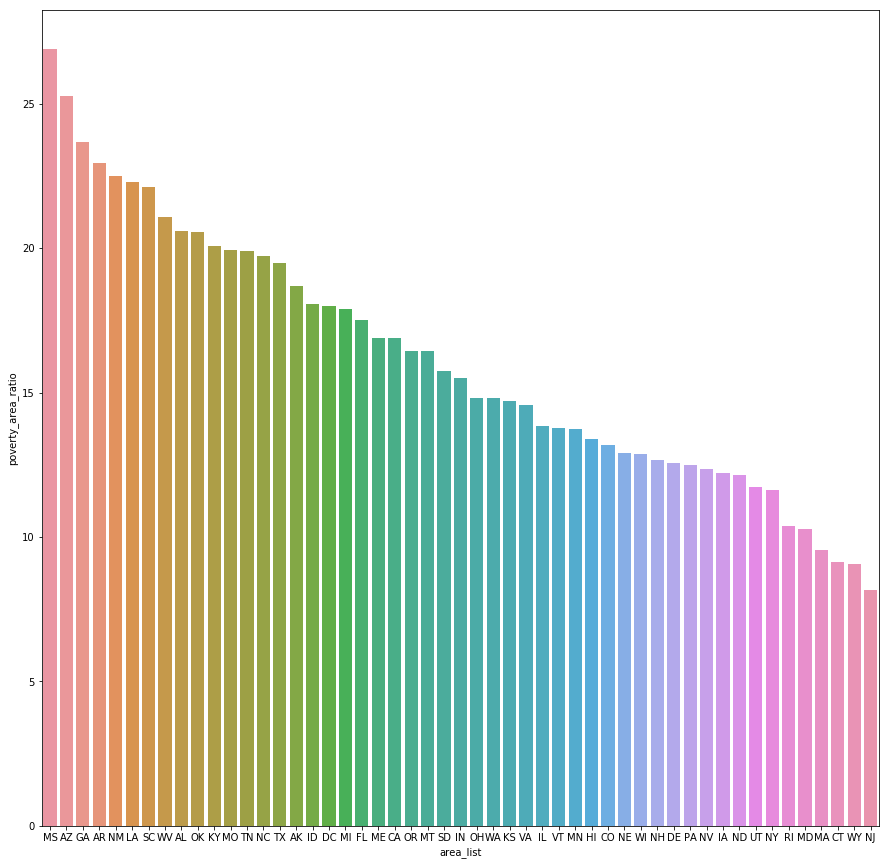

In [142]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace=True)
percentage_people_below_poverty_level.poverty_rate=percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list=list(percentage_people_below_poverty_level['Geographic Area'])
poverty_area_ratio=[]
for i in area_list:
    x=percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    poverty_area=(sum(x.poverty_rate)/len(x))
    poverty_area_ratio.append(poverty_area)
    
data=pd.DataFrame({'area_list':area_list,'poverty_area_ratio':poverty_area_ratio})
new_index=(data['poverty_area_ratio'].sort_values(ascending=False)).index.values
sorted_data1=data.reindex(new_index)
#visualization

plt.figure(figsize=(15,15))
sns.barplot(x=sorted_data1['area_list'],y=sorted_data1['poverty_area_ratio'])
plt.xtick(rotation=45)
plt.xlabel('area_list')
plt.ylabel('poverty_area_ratio')
plt.title('poverty_area_ratio')
plt.show()







In [ ]:
kill.head()

In [ ]:
#kill.name.value_counts()

In [ ]:
#kill.info()

In [156]:
seperate=kill.name[kill.name!='TK TK'].str.split()
a,b=zip(*seperate)
name_list=a+b
name_count = Counter(name_list)
most_common_name=name_count.most_common(15)
x,y=zip(*most_common_name)
x,y=list(x),list(y)
plt.figure(figsize=(15/10))
sns.barplot(x=x,y=y,color='blue')
plt.xlabel('killed_name')
plt.ylabel('frequency')
plt.show()


NameError: name 'Counter' is not defined

In [ ]:
percent_over_25_completed_highSchool.head()

In [ ]:
#percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

In [ ]:
percent_over_25_completed_highSchool.info()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: module 'matplotlib.pyplot' has no attribute 'xkabel'

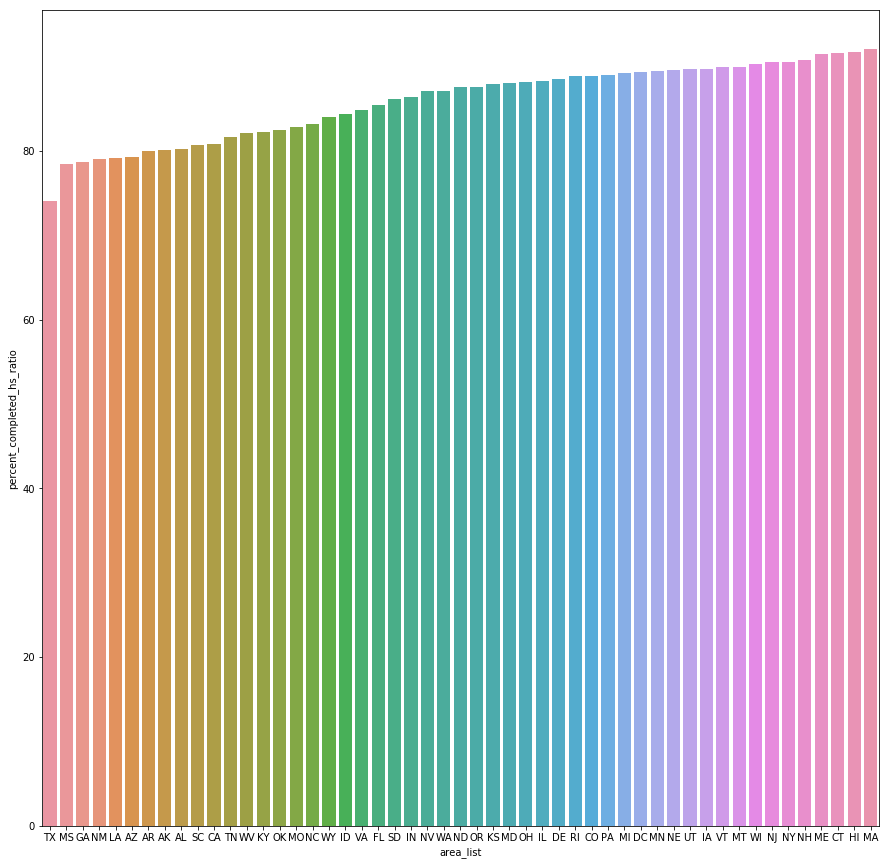

In [143]:
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace=True)
percent_over_25_completed_highSchool.percent_completed_hs=percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list=list(percent_over_25_completed_highSchool['Geographic Area'])
percent_completed_hs_ratio=[]
for i in area_list:
    x=percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    completed_highSchool_rate=sum(x.percent_completed_hs)/len(x)
    percent_completed_hs_ratio.append(completed_highSchool_rate)
    
data=pd.DataFrame({'area_list':area_list,'percent_completed_hs_ratio':percent_completed_hs_ratio})
new_index=(data['percent_completed_hs_ratio'].sort_values(ascending=True)).index.values
sorted_data2=data.reindex(new_index)

plt.figure(figsize=(15,15))
sns.barplot(x=sorted_data2['area_list'],y=sorted_data2['percent_completed_hs_ratio']) 
plt.xkabel('state')
plt.ylabel('highschool graduate rate')
plt.xticks(rotation=45)
plt.title('percentage over 25 copmleted graduated school rate')
plt.show()

In [ ]:
share_race_city.head()
share_race_city.info()

In [ ]:
share_race_city.replace(['-'],0.0,inplace=True)
share_race_city.replace(['(X)'],0.0,inplace = True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))


f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")










/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


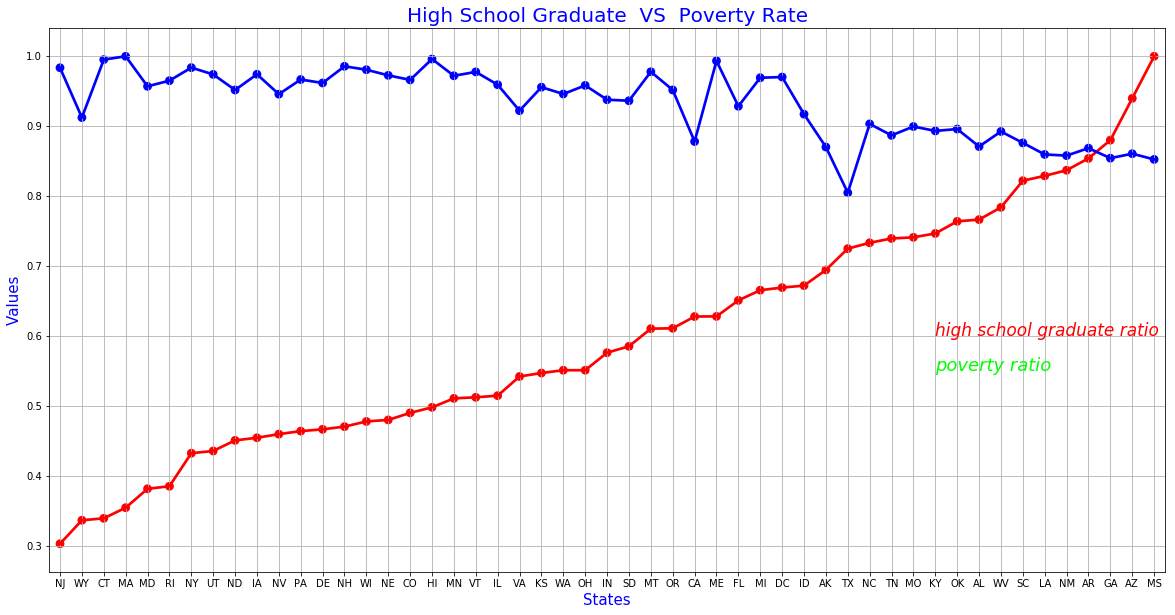

In [147]:
sorted_data1['poverty_area_ratio']=sorted_data1['poverty_area_ratio']/max(sorted_data1['poverty_area_ratio'])
sorted_data2['percent_completed_hs_ratio']=sorted_data2['percent_completed_hs_ratio']/max(sorted_data2['percent_completed_hs_ratio'])
data=pd.concat([sorted_data1,sorted_data2['percent_completed_hs_ratio']],axis=1)
data.sort_values('poverty_area_ratio',inplace=True)

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='poverty_area_ratio',data=data,color='red')
sns.pointplot(x='area_list',y='percent_completed_hs_ratio',data=data,color='blue')
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()


In [153]:
data.head()

,area_list,poverty_area_ratio,percent_completed_hs_ratio
16158,NJ,0.303558,0.983615
16231,NJ,0.303558,0.983615
16232,NJ,0.303558,0.983615
16233,NJ,0.303558,0.983615
16234,NJ,0.303558,0.983615


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


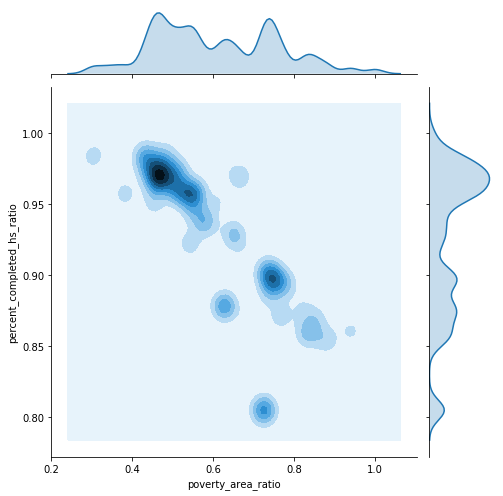

In [155]:
g = sns.jointplot(data.poverty_area_ratio, data.percent_completed_hs_ratio, kind="kde", size=7)
plt.savefig('graph.png')
plt.show()

In [157]:
data.head()

,area_list,poverty_area_ratio,percent_completed_hs_ratio
16158,NJ,0.303558,0.983615
16231,NJ,0.303558,0.983615
16232,NJ,0.303558,0.983615
16233,NJ,0.303558,0.983615
16234,NJ,0.303558,0.983615


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


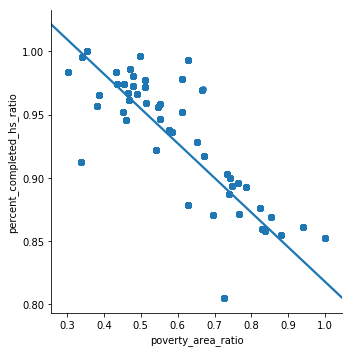

In [158]:
sns.lmplot(x='poverty_area_ratio',y='percent_completed_hs_ratio',data=data)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


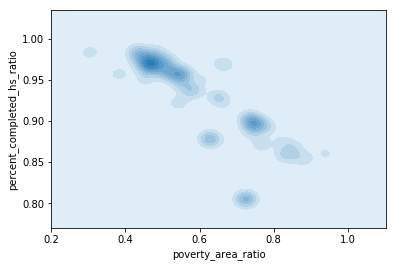

In [159]:
sns.kdeplot(data.poverty_area_ratio,data.percent_completed_hs_ratio,shade=True,cut=5)
plt.show()

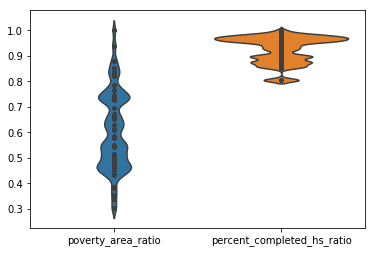

In [160]:
sns.violinplot(data=data,inner='points')
plt.show()

In [161]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


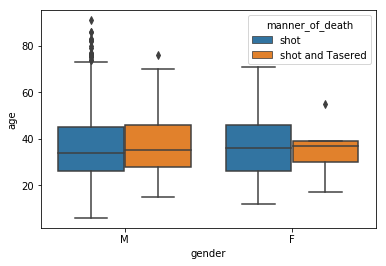

In [162]:
sns.boxplot(x='gender',y='age',hue='manner_of_death',data=kill)
plt.show()

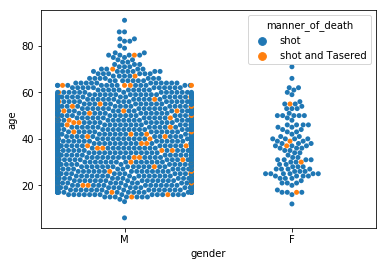

<Figure size 720x720 with 0 Axes>

In [164]:
sns.swarmplot(x='gender',y='age',hue='manner_of_death',data=kill)
plt.figure(figsize=(10,10))
plt.show()

In [166]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [167]:
kill.race.dropna(inplace=True)
labels=kill.race.value_counts.index
colors=['dark','blue','yellow','grey','green','pink']
explode=[0,0,0,0,0,0]
sizes=kill.race.value_counts().values
plt.pie(sizes,explode=explode,colors=colors,labels=labels)
plt.title('pie chart kill race',color='blue')

AttributeError: 'function' object has no attribute 'index'